In [1]:
import pandas as pd
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [2]:
# import like this
items_path = "items.csv"
q1_path = "quarter-1.csv"
q2_path = "quarter-2.csv"
q3_path = "quarter-3.csv"

q1 = pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)
items.head()

,item_id,item_name
0,0,Chips and Fresh Tomato Salsa
1,1,Izze
2,2,Nantucket Nectar
3,3,Chips and Tomatillo-Green Chili Salsa
4,4,Chicken Bowl


In [3]:
q1.head()

,order_id,quantity,item_id,choice_description_id,item_price
0,1,1,1,1,$3.39
1,1,1,2,2,$3.39
2,2,2,4,3,$16.98
3,4,1,7,6,$9.25
4,6,1,9,8,$8.75


In [4]:
q2.head()

,order_id,quantity,item_id,choice_description_id,item_price
0,1,1,0,0,$2.39
1,1,1,3,0,$2.39
2,3,1,4,4,$10.98
3,3,1,5,0,$1.69
4,4,1,6,5,$11.75


In [5]:
q3.head()

,order_id,quantity,item_id,choice_description_id,item_price


### `Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [6]:
# code here
# 1 
quartile = pd.concat([q1, q2, q3], ignore_index=True)
quartile.head()

,order_id,quantity,item_id,choice_description_id,item_price
0,1,1,1,1,$3.39
1,1,1,2,2,$3.39
2,2,2,4,3,$16.98
3,4,1,7,6,$9.25
4,6,1,9,8,$8.75


In [7]:
# 2 
df1 = pd.concat([q1, q2, q3], keys=['Q-1', 'Q-2', 'Q-3'])
df1

order_id quantity item_id choice_description_id item_price
Q-1 0           1        1       1                     1     $3.39 
    1           1        1       2                     2     $3.39 
    2           2        2       4                     3    $16.98 
    3           4        1       7                     6     $9.25 
    4           6        1       9                     8     $8.75 
...           ...      ...     ...                   ...        ...
Q-2 2342     1829        1      23                    92    $11.25 
    2343     1830        1      23                  1043    $11.25 
    2344     1832        1      10                   116     $8.75 
    2345     1832        1       8                     0     $4.45 
    2346     1834        1      20                   515    $11.25 

[4622 rows x 5 columns]

In [8]:
# 3 My attempt
items.merge(q1, on='item_id').groupby(['item_id', 'item_name']).count().sort_values(by='quantity', ascending=False)

,,order_id,quantity,choice_description_id,item_price
item_id,item_name,,,,
4,Chicken Bowl,351,351,351,351
11,Chicken Burrito,269,269,269,269
8,Chips and Guacamole,245,245,245,245
6,Steak Burrito,184,184,184,184
33,Canned Soft Drink,126,126,126,126
21,Steak Bowl,111,111,111,111
19,Chips,103,103,103,103
16,Bottled Water,80,80,80,80
0,Chips and Fresh Tomato Salsa,57,57,57,57


In [9]:
# 3 Actual solution
new_df = df1.reset_index().merge(items, on='item_id')
new_df.rename(columns={'level_0': 'quarter'}, inplace=True)

# since we called as_index = False here, it will work as reset_index 
new_df.groupby(['quarter', 'item_name'], as_index=False)['quantity'].sum().sort_values('quantity',
                                                                                       ascending=False).drop_duplicates(
    subset='quarter', keep='first')

,quarter,item_name,quantity
65,Q-2,Chicken Bowl,394
17,Q-1,Chicken Bowl,367


In [10]:
new_df.head()

,quarter,level_1,order_id,quantity,item_id,choice_description_id,item_price,item_name
0,Q-1,0,1,1,1,1,$3.39,Izze
1,Q-1,1,1,1,2,2,$3.39,Nantucket Nectar
2,Q-1,2,2,2,4,3,$16.98,Chicken Bowl
3,Q-1,3,4,1,7,6,$9.25,Steak Soft Tacos
4,Q-1,4,6,1,9,8,$8.75,Chicken Crispy Tacos


In [11]:
# 4 
# removing dollar signs and converting the item_price to float
new_df['item_price'] = new_df.item_price.apply(lambda x: float(x[1:]))
new_df['total_item_price'] = new_df['item_price'] * new_df['quantity']
new_df.groupby(['quarter', 'item_name'], as_index=False)['total_item_price'].sum().sort_values('total_item_price',
                                                                                               ascending=False)

,quarter,item_name,total_item_price
65,Q-2,Chicken Bowl,4192.25
17,Q-1,Chicken Bowl,3852.38
66,Q-2,Chicken Burrito,3258.15
18,Q-1,Chicken Burrito,3128.91
84,Q-2,Steak Burrito,2172.99
...,...,...,...
14,Q-1,Carnitas Salad,8.99
46,Q-1,Veggie Salad,8.49
91,Q-2,Veggie Crispy Tacos,8.49
56,Q-2,Bowl,7.4


In [12]:
new_df.groupby(['quarter', 'item_name'], as_index=False)['total_item_price'].sum().sort_values('total_item_price',
                                                                                               ascending=False).drop_duplicates(
    "quarter", keep='first')

,quarter,item_name,total_item_price
65,Q-2,Chicken Bowl,4192.25
17,Q-1,Chicken Bowl,3852.38


In [13]:
# 5 
new_df.groupby(['quarter', 'order_id'], as_index=False)['total_item_price'].sum()

,quarter,order_id,total_item_price
0,Q-1,1,6.78
1,Q-1,2,33.96
2,Q-1,4,9.25
3,Q-1,6,17.5
4,Q-1,7,11.25
...,...,...,...
2892,Q-2,1828,4.45
2893,Q-2,1829,11.25
2894,Q-2,1830,11.25
2895,Q-2,1832,13.2


In [14]:
new_df.groupby(['quarter', 'order_id'], as_index=False)['total_item_price'].sum().groupby(['quarter'], as_index=False)[
    'total_item_price'].mean()

,quarter,total_item_price
0,Q-1,13.809488
1,Q-2,13.279828


### `Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [15]:
# code here
balls = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
matches = pd.read_csv('IPL_Matches_2008_2022.csv')
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [16]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [17]:
season_df = balls.merge(matches[['ID', "Season"]], on='ID')
season_df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,2022
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,2022
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022


In [18]:
balls.kind.unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [19]:
balls.extra_type.unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [20]:
season_df['isBowlerWicket'] = season_df.kind.apply(
    lambda x: 1 if x in ['caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
                         'lbw', 'hit wicket'] else 0)

season_df['BowlerRun'] = season_df.extra_type.apply(lambda x: 0 if x in ['legbyes', 'byes'] else 1) * season_df[
    'total_run']

season_df['isLegalBall'] = season_df.extra_type.apply(lambda x: 0 if x in ['wides', 'noballs'] else 1)
pcap_df = season_df.groupby(['Season', 'bowler'], as_index=False)[['isBowlerWicket', 'BowlerRun', 'isLegalBall']].sum()
pcap_df.head()

,Season,bowler,isBowlerWicket,BowlerRun,isLegalBall
0,2007/08,A Kumble,8,304,230
1,2007/08,A Mishra,11,138,119
2,2007/08,A Nehra,14,348,269
3,2007/08,A Nel,1,31,18
4,2007/08,A Symonds,0,101,41


In [21]:
pcap_df['Economy'] = (pcap_df['BowlerRun'] / pcap_df['isLegalBall']) * 6
pcap_df.sort_values(['isBowlerWicket', 'Economy'], ascending=[False, True]).head()

,Season,bowler,isBowlerWicket,BowlerRun,isLegalBall,Economy
1467,2021,HV Patel,35,459,338,8.147929
629,2013,DJ Bravo,34,497,375,7.952000
654,2013,JP Faulkner,33,427,379,6.759894
1381,2020/21,K Rabada,32,549,398,8.276382
447,2011,SL Malinga,30,375,378,5.952381


In [22]:
pcap_df.sort_values(['isBowlerWicket', 'Economy'], ascending=[False, True]).drop_duplicates('Season',
                                                                                            keep='first').head().sort_values(
    'Season')

,Season,bowler,isBowlerWicket,BowlerRun,isLegalBall,Economy
447,2011,SL Malinga,30,375,378,5.952381
537,2012,M Morkel,30,453,378,7.190476
629,2013,DJ Bravo,34,497,375,7.952000
1381,2020/21,K Rabada,32,549,398,8.276382
1467,2021,HV Patel,35,459,338,8.147929


### `Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [23]:
season_df.overs.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [24]:
death_overs = season_df[season_df.overs >= 15]
death_overs.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season,isBowlerWicket,BowlerRun,isLegalBall
90,1312200,1,15,1,R Ashwin,R Sai Kishore,R Parag,NaN,1,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,1,1
91,1312200,1,15,2,R Parag,R Sai Kishore,R Ashwin,NaN,1,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,1,1
92,1312200,1,15,3,R Ashwin,R Sai Kishore,R Parag,NaN,1,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,1,1
93,1312200,1,15,4,R Parag,R Sai Kishore,R Ashwin,NaN,1,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,1,1
94,1312200,1,15,5,R Ashwin,R Sai Kishore,R Parag,NaN,0,0,...,0,1,R Ashwin,caught,DA Miller,Rajasthan Royals,2022,1,0,1


In [25]:
# code here
pcapdf = death_overs.groupby("bowler", as_index=False)[["isBowlerWicket", "BowlerRun", "isLegalBall"]].sum()
pcapdf["Economy"] = pcapdf["BowlerRun"] / pcapdf["isLegalBall"] * 6
pcapdf.sort_values(["isBowlerWicket", "Economy"], ascending=[False, True]).head()

,bowler,isBowlerWicket,BowlerRun,isLegalBall,Economy
91,DJ Bravo,130,2161,1385,9.361733
331,SL Malinga,122,1464,1117,7.863921
53,B Kumar,95,1752,1173,8.961637
148,JJ Bumrah,90,1614,1146,8.450262
339,SP Narine,77,1164,949,7.359326


In [26]:
# code here

### `Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [27]:
# code here
batter_df = season_df.copy()
batter_df['isBatsmanBall'] = batter_df['extra_type'].apply(lambda x: 1 if x != 'wides' else 0)


def bat_record_season(batsman):
    b_df = batter_df[batter_df.batter == batsman].copy()
    b_df['isBatsmanOut'] = b_df.batter == b_df.player_out
    df = b_df.groupby(['Season', 'ID'], as_index=False)[['batsman_run', 'isBatsmanBall', 'isBatsmanOut']].sum()
    innings = df.groupby('Season').ID.count()
    df = df.groupby('Season').agg(
        {
            'batsman_run': ['sum', 'max'],
            'isBatsmanBall': 'sum',
            'isBatsmanOut': 'sum'
        }
    )
    df['Innings'] = innings
    df['TotalRuns'] = df[('batsman_run', 'sum')]
    df['Avg'] = df['TotalRuns'] / df[('isBatsmanOut', 'sum')]
    df['HighestScore'] = df[('batsman_run', 'max')]
    df['StrikeRate'] = (df['TotalRuns'] / df[('isBatsmanBall', 'sum')]) * 100

    return df.drop(columns=['batsman_run', 'isBatsmanBall', 'isBatsmanOut'])


print(bat_record_season("MS Dhoni"))

        Innings TotalRuns         Avg HighestScore  StrikeRate
                                                              
Season                                                        
2007/08      14       414   41.400000           65  133.548387
2009         13       332   41.500000           58  127.203065
2009/10      11       287   31.888889           66  136.666667
2011         13       392   43.555556           70  158.704453
2012         17       358   32.545455           51  128.776978
2013         16       461   46.100000           67  162.897527
2014         15       371   74.200000           57  148.400000
2015         17       372   31.000000           53  121.967213
2016         12       284   40.571429           64  135.238095
2017         15       290   26.363636           61  116.000000
2018         15       455   75.833333           79  150.662252
2019         12       416  104.000000           84  134.627832
2020/21      12       200   25.000000           47  116

### `Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [28]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [29]:
# Player of match is here
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [30]:
df = balls.merge(matches[['ID', 'Player_of_Match']], on='ID')
batter_df = df[df.batter == df.Player_of_Match].copy()
batter_df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Player_of_Match
148,1312200,2,4,4,HH Pandya,TA Boult,Shubman Gill,wides,0,1,1,0,0,NaN,NaN,NaN,Gujarat Titans,HH Pandya
149,1312200,2,4,5,HH Pandya,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,HH Pandya
150,1312200,2,4,6,HH Pandya,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,HH Pandya
151,1312200,2,4,7,HH Pandya,TA Boult,Shubman Gill,wides,0,1,1,0,0,NaN,NaN,NaN,Gujarat Titans,HH Pandya
152,1312200,2,4,8,HH Pandya,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,HH Pandya


In [31]:
batter_df['isBatsmanBall'] = batter_df['extra_type'].apply(lambda x: 1 if x != 'wides' else 0)
batter = batter_df.groupby(['ID', 'batter'], as_index=False)[['batsman_run', 'isBatsmanBall']].sum()
batter.head()

,ID,batter,batsman_run,isBatsmanBall
0,335982,BB McCullum,158,73
1,335983,MEK Hussey,116,54
2,335985,MV Boucher,39,19
3,335986,DJ Hussey,38,43
4,335987,SR Watson,76,49


In [32]:
batter['BattingFigure'] = batter[['batsman_run', 'isBatsmanBall']].apply(lambda x: '/'.join(map(str, x.values)), axis=1)
batter.rename(columns={'batter': 'PlayerOfMatch'}, inplace=True)
batter.head()

,ID,PlayerOfMatch,batsman_run,isBatsmanBall,BattingFigure
0,335982,BB McCullum,158,73,158/73
1,335983,MEK Hussey,116,54,116/54
2,335985,MV Boucher,39,19,39/19
3,335986,DJ Hussey,38,43,38/43
4,335987,SR Watson,76,49,76/49


In [33]:
# above we calculated for batsman
# same for bowler now 

bowler_df = df[df.bowler == df.Player_of_Match].copy()
bowler_df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Player_of_Match
48,1312200,1,8,1,JC Buttler,HH Pandya,SV Samson,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,HH Pandya
49,1312200,1,8,2,SV Samson,HH Pandya,JC Buttler,NaN,0,0,0,0,1,SV Samson,caught,R Sai Kishore,Rajasthan Royals,HH Pandya
50,1312200,1,8,3,D Padikkal,HH Pandya,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,HH Pandya
51,1312200,1,8,4,D Padikkal,HH Pandya,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,HH Pandya
52,1312200,1,8,5,D Padikkal,HH Pandya,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,HH Pandya


In [34]:
bowler_df['isBowlerWicket'] = bowler_df['kind'].apply(
    lambda x: 1 if x in ['caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
                         'lbw', 'hit wicket'] else 0)

bowler_df['BowlerRun'] = bowler_df.extra_type.apply(lambda x: 0 if x in ['legbyes', 'byes'] else 1) * bowler_df[
    'total_run']

bowler = bowler_df.groupby(['ID', 'bowler'], as_index=False)[['isBowlerWicket', 'BowlerRun']].sum()
bowler.head()
# Wickets the bowler got 
# and runs conceded

,ID,bowler,isBowlerWicket,BowlerRun
0,335984,MF Maharoof,2,11
1,335986,DJ Hussey,1,35
2,335987,SR Watson,0,39
3,335990,YK Pathan,2,20
4,335992,SR Watson,3,20


In [35]:
bowler['BowlingFigure'] = bowler[['isBowlerWicket', 'BowlerRun']].apply(lambda x: '/'.join(map(str, x.values)), axis=1)
bowler.rename(columns={'bowler': 'PlayerOfMatch'}, inplace=True)
bowler.head()

,ID,PlayerOfMatch,isBowlerWicket,BowlerRun,BowlingFigure
0,335984,MF Maharoof,2,11,2/11
1,335986,DJ Hussey,1,35,1/35
2,335987,SR Watson,0,39,0/39
3,335990,YK Pathan,2,20,2/20
4,335992,SR Watson,3,20,3/20


In [36]:
# merging batter and bowler
batter.merge(bowler, on=['ID', 'PlayerOfMatch'], how='outer').drop(
    columns=['batsman_run', 'isBatsmanBall', 'isBowlerWicket', 'BowlerRun']).head()

,ID,PlayerOfMatch,BattingFigure,BowlingFigure
0,335982,BB McCullum,158/73,NaN
1,335983,MEK Hussey,116/54,NaN
2,335984,MF Maharoof,NaN,2/11
3,335985,MV Boucher,39/19,NaN
4,335986,DJ Hussey,38/43,1/35


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [37]:
import pandas as pd

sepal_all = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")

sepal_all.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm
0,0,1,5.1,3.5
1,1,2,4.9,3.0
2,2,3,4.7,3.2
3,3,4,4.6,3.1
4,4,5,5.0,3.6


In [38]:
petal_all.head()

,Unnamed: 0,Id,PetalLengthCm,PetalWidthCm
0,0,1,1.4,0.2
1,1,2,1.4,0.2
2,2,3,1.3,0.2
3,3,4,1.5,0.2
4,4,5,1.4,0.2


In [39]:
virginica.head()

,Unnamed: 0,Id,Species
0,100,101,Iris-virginica
1,101,102,Iris-virginica
2,102,103,Iris-virginica
3,103,104,Iris-virginica
4,104,105,Iris-virginica


In [40]:
versicolor.head()

,Unnamed: 0,Id,Species
0,50,51,Iris-versicolor
1,51,52,Iris-versicolor
2,52,53,Iris-versicolor
3,53,54,Iris-versicolor
4,54,55,Iris-versicolor


In [41]:
setosa.head()

,Unnamed: 0,Id,Species
0,0,1,Iris-setosa
1,1,2,Iris-setosa
2,2,3,Iris-setosa
3,3,4,Iris-setosa
4,4,5,Iris-setosa


### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

In [47]:
virginica.merge(sepal_all, on='Id').head()

,Unnamed: 0_x,Id,Species,Unnamed: 0_y,SepalLengthCm,SepalWidthCm
0,100,101,Iris-virginica,100,6.3,3.3
1,101,102,Iris-virginica,101,5.8,2.7
2,102,103,Iris-virginica,102,7.1,3.0
3,103,104,Iris-virginica,103,6.3,2.9
4,104,105,Iris-virginica,104,6.5,3.0


In [48]:
sepal = virginica.merge(sepal_all, on='Id')['SepalLengthCm'].mean()
sepal

6.587999999999998

In [49]:
petal = setosa.merge(petal_all, on='Id')['PetalLengthCm'].mean()
petal

1.464

<Axes: xlabel='kind'>

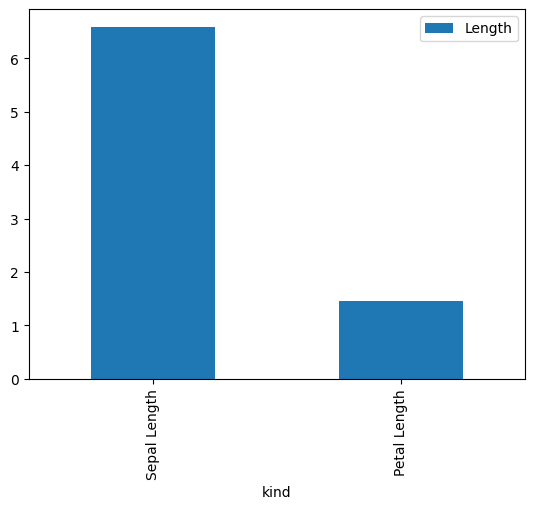

In [50]:
pd.DataFrame({'kind': ['Sepal Length', 'Petal Length'], 'Length': [sepal, petal]}).plot(x='kind', kind='bar')

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [54]:
virginica.merge(sepal_all, on='Id').head()

,Unnamed: 0_x,Id,Species,Unnamed: 0_y,SepalLengthCm,SepalWidthCm
0,100,101,Iris-virginica,100,6.3,3.3
1,101,102,Iris-virginica,101,5.8,2.7
2,102,103,Iris-virginica,102,7.1,3.0
3,103,104,Iris-virginica,103,6.3,2.9
4,104,105,Iris-virginica,104,6.5,3.0


In [55]:
virginica.merge(sepal_all, on='Id').merge(petal_all, on='Id').head()

,Unnamed: 0_x,Id,Species,Unnamed: 0_y,SepalLengthCm,SepalWidthCm,Unnamed: 0,PetalLengthCm,PetalWidthCm
0,100,101,Iris-virginica,100,6.3,3.3,100,6.0,2.5
1,101,102,Iris-virginica,101,5.8,2.7,101,5.1,1.9
2,102,103,Iris-virginica,102,7.1,3.0,102,5.9,2.1
3,103,104,Iris-virginica,103,6.3,2.9,103,5.6,1.8
4,104,105,Iris-virginica,104,6.5,3.0,104,5.8,2.2


In [57]:
v_sepal = virginica.merge(sepal_all, on='Id').drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
v = v_sepal.merge(petal_all, on='Id').drop(columns=['Unnamed: 0'])

s_sepal = setosa.merge(sepal_all, on='Id').drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
s = s_sepal.merge(petal_all, on='Id').drop(columns=['Unnamed: 0'])

ver_sepal = versicolor.merge(sepal_all, on='Id').drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
ver = ver_sepal.merge(petal_all, on='Id').drop(columns=['Unnamed: 0'])

In [59]:
pd.concat([v, s, ver]).sample(150)

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
38,89,Iris-versicolor,5.6,3.0,4.1,1.3
12,113,Iris-virginica,6.8,3.0,5.5,2.1
47,48,Iris-setosa,4.6,3.2,1.4,0.2
37,38,Iris-setosa,4.9,3.1,1.5,0.1
39,40,Iris-setosa,5.1,3.4,1.5,0.2
...,...,...,...,...,...,...
27,28,Iris-setosa,5.2,3.5,1.5,0.2
3,104,Iris-virginica,6.3,2.9,5.6,1.8
23,124,Iris-virginica,6.3,2.7,4.9,1.8
48,149,Iris-virginica,6.2,3.4,5.4,2.3


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [60]:
print(f"""Minimum Sepal width of Setosa is {s.SepalWidthCm.min()}
Maximum Sepal width of Setosa is {s.SepalWidthCm.max()}

**************************************************

Minimum Sepal width of Versicolor is {ver.SepalWidthCm.min()}
Maximum Sepal width of Versicolor is {ver.SepalWidthCm.max()}""")

Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4


In [42]:
# code here

In [43]:
# code here

In [44]:
# code here